DATA CREATION

You're working with app feedback data where each row is a user’s:

- Behavior metrics (e.g., engagement, time spent)
- Free-text feedback on the app

In [1]:
import pandas as pd
import numpy as np

np.random.seed(28)

n = 500

# Simulate behavior
behavior = pd.DataFrame({
    'User_ID': np.arange(1, n + 1),
    'Total_Sessions': np.random.poisson(20, n),
    'Avg_Session_Length_Min': np.round(np.random.normal(13, 4, n), 1),
    'Courses_Completed': np.random.poisson(2, n),
    'Days_Since_Last_Login': np.random.randint(1, 60, n)
})

# Simulate basic feedback categories
feedback_pool = [
    "App is amazing and easy to use.",
    "Too many bugs and crashes lately.",
    "Content is outdated.",
    "Loved the UI and smooth performance!",
    "Subscription is too expensive.",
    "I want more advanced-level content.",
    "Not enough language support.",
    "Helpful for beginners.",
    "Slow loading times ruin the experience.",
    "I wish there were more practical examples."
]

feedback = pd.DataFrame({
    'User_ID': behavior['User_ID'],
    'Feedback_Text': np.random.choice(feedback_pool, n)
})

df = pd.merge(behavior, feedback, on='User_ID')
df.to_csv("mixed_feedback_data.csv", index=False)


## Task:
1. Quantitative + Text Fusion

- For each feedback category (grouped by similar phrases), compute:
    - Avg. sessions
    - Avg. courses completed
    - Avg. login recency

- Use text matching / keyword rules (no need for ML)

2. Insight Report

- Which 2 feedback themes come from most loyal users?
- Which 2 come from at-risk users (e.g., low login, low engagement)?
- Recommend:
    - 1 product fix
    - 1 communication tweak

3. (Bonus) Word Cloud or Bar Chart
- Show most common keywords/themes in feedback

In [2]:
df.head()

,User_ID,Total_Sessions,Avg_Session_Length_Min,Courses_Completed,Days_Since_Last_Login,Feedback_Text
0,1,23,25.3,2,46,I want more advanced-level content.
1,2,14,9.3,2,30,Content is outdated.
2,3,24,18.5,1,30,App is amazing and easy to use.
3,4,16,13.5,3,2,Subscription is too expensive.
4,5,29,16.8,2,38,Helpful for beginners.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 500 non-null    int64  
 1   Total_Sessions          500 non-null    int32  
 2   Avg_Session_Length_Min  500 non-null    float64
 3   Courses_Completed       500 non-null    int32  
 4   Days_Since_Last_Login   500 non-null    int32  
 5   Feedback_Text           500 non-null    object 
dtypes: float64(1), int32(3), int64(1), object(1)
memory usage: 17.7+ KB


In [12]:
df['Feedback_Text'].value_counts()

Feedback_Text
Helpful for beginners.                        62
Not enough language support.                  60
App is amazing and easy to use.               54
Loved the UI and smooth performance!          54
Subscription is too expensive.                51
Content is outdated.                          49
Too many bugs and crashes lately.             47
I want more advanced-level content.           46
I wish there were more practical examples.    39
Slow loading times ruin the experience.       38
Name: count, dtype: int64

In [5]:
def categorize_feedback(text):
    text = text.lower()
    if "bug" in text or "crash" in text:
        return "Bugs"
    elif "expensive" in text:
        return "Pricing"
    elif "slow" in text or "loading" in text:
        return "Performance"
    elif "outdated" in text or "content" in text:
        return "Content Issues"
    elif "ui" in text or "easy" in text:
        return "Positive Experience"
    else:
        return "Other"

df['Feedback_Theme'] = df['Feedback_Text'].apply(categorize_feedback)


In [6]:
summary = df.groupby('Feedback_Theme').agg({
    'Total_Sessions': 'mean',
    'Courses_Completed': 'mean',
    'Days_Since_Last_Login': 'mean',
    'User_ID': 'count'
}).rename(columns={'User_ID': 'Feedback_Count'}).sort_values(by='Feedback_Count', ascending=False)


In [8]:
summary

,Total_Sessions,Courses_Completed,Days_Since_Last_Login,Feedback_Count
Feedback_Theme,,,,
Other,19.782609,1.900621,28.546584,161
Positive Experience,19.157407,2.018519,32.101852,108
Content Issues,20.389474,1.863158,30.526316,95
Pricing,19.549020,2.058824,28.843137,51
Bugs,20.170213,1.595745,31.468085,47
Performance,19.710526,1.842105,29.605263,38


In [7]:
df.head()

,User_ID,Total_Sessions,Avg_Session_Length_Min,Courses_Completed,Days_Since_Last_Login,Feedback_Text,Feedback_Theme
0,1,23,25.3,2,46,I want more advanced-level content.,Content Issues
1,2,14,9.3,2,30,Content is outdated.,Content Issues
2,3,24,18.5,1,30,App is amazing and easy to use.,Positive Experience
3,4,16,13.5,3,2,Subscription is too expensive.,Pricing
4,5,29,16.8,2,38,Helpful for beginners.,Other


In [9]:
summary.describe()

,Total_Sessions,Courses_Completed,Days_Since_Last_Login,Feedback_Count
count,6.000000,6.000000,6.000000,6.000000
mean,19.793208,1.879829,30.181873,83.333333
std,0.440110,0.163775,1.432352,47.323004
min,19.157407,1.595745,28.546584,38.000000
25%,19.589396,1.847368,29.033669,48.000000
50%,19.746568,1.881890,30.065789,73.000000
75%,20.073312,1.989044,31.232643,104.750000
max,20.389474,2.058824,32.101852,161.000000


In [11]:
# Compute engagement score
df["Engagement_Score"] = (
    df["Total_Sessions"].rank(pct=True) * 0.4 +
    df["Courses_Completed"].rank(pct=True) * 0.4 +
    (1 - df["Days_Since_Last_Login"].rank(pct=True)) * 0.2
)

df["User_Status"] = pd.qcut(df["Engagement_Score"], q=3, labels=["At Risk", "Neutral", "Loyal"])

# Top 2 themes per user segment
loyal_top = df[df["User_Status"] == "Loyal"]["Feedback_Theme"].value_counts().head(2)
at_risk_top = df[df["User_Status"] == "At Risk"]["Feedback_Theme"].value_counts().head(2)

print("Top 2 Themes from Loyal Users:\n", loyal_top)
print("\n Top 2 Themes from At-Risk Users:\n", at_risk_top)

Top 2 Themes from Loyal Users:
 Feedback_Theme
Other             53
Content Issues    34
Name: count, dtype: int64

 Top 2 Themes from At-Risk Users:
 Feedback_Theme
Other                  48
Positive Experience    37
Name: count, dtype: int64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

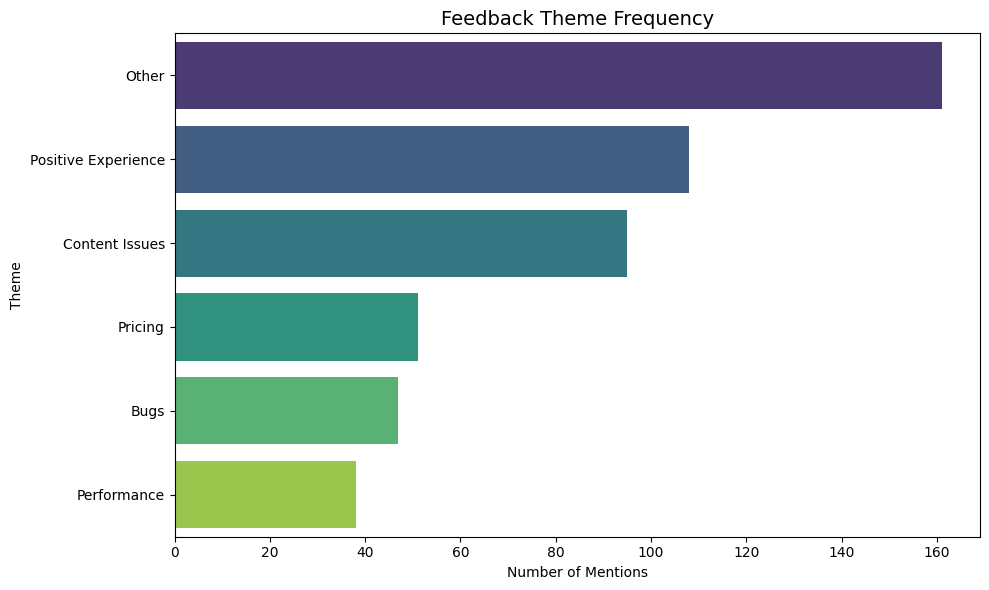

In [20]:
plt.figure(figsize=(10, 6))
theme_counts = df['Feedback_Theme'].value_counts()
sns.barplot(x=theme_counts.values, y=theme_counts.index, hue=theme_counts.index, palette='viridis', legend= False)

plt.title("Feedback Theme Frequency", fontsize=14)
plt.xlabel("Number of Mentions")
plt.ylabel("Theme")
plt.tight_layout()
plt.show()


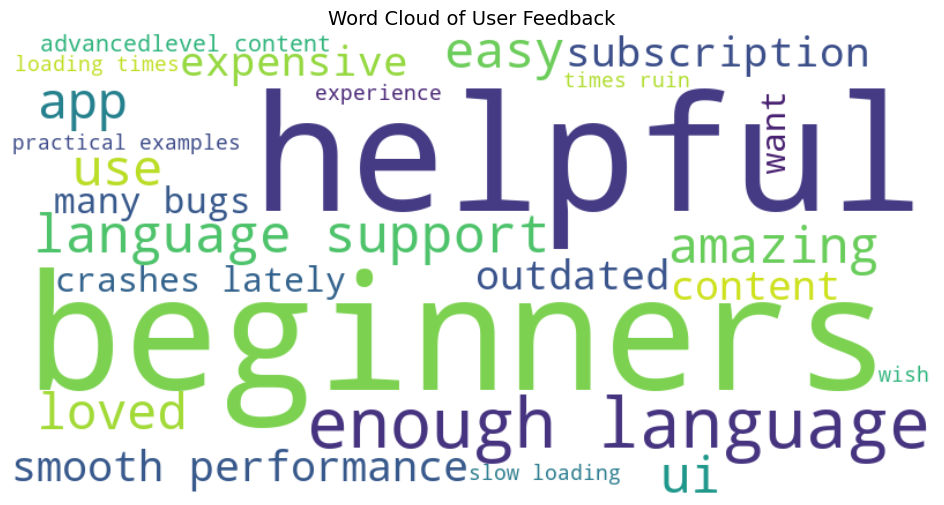

In [16]:
from wordcloud import WordCloud
import string

# Combine all feedback
text = " ".join(df['Feedback_Text'].dropna().astype(str).tolist())

# Optional: Basic cleanup
text = text.translate(str.maketrans('', '', string.punctuation)).lower()

# Create WordCloud
wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of User Feedback", fontsize=14)
plt.show()
